# Desafio - Cenário I

In [1]:
#Se der erro na importação do Excel, executar a linha abaixo para atualizar xlrd
#!pip install -U xlrd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Base de dados Orders

In [3]:
orders = pd.read_excel("dataset\sample.xls")

In [4]:
orders.shape

(9994, 21)

In [5]:
orders['Sales No Discount'] = orders.Sales / (1-orders.Discount)

In [6]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales No Discount
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,261.96
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,731.94
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,14.62
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1741.05
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,27.96


Não existem valores NA

In [7]:
orders.isna().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Sales No Discount    0
dtype: int64

In [8]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Sales No Discount'],
      dtype='object')

Buscando, em cada coluna categórica, valores únicos.
Quando possível, investigada inicialmente as quantidades de cada valor único

Analisando coluna **Order ID**

In [179]:
#5009 ordens únicas
print("IDs únicos:", orders['Order ID'].nunique())

IDs únicos: 5009


Coluna **Ship Date**

In [180]:
print("Datas únicas:",orders['Ship Date'].nunique())

Datas únicas: 1334


Coluna **Ship Mode**

In [153]:
print("Modos de envio:",orders['Ship Mode'].unique())

Modos de envio: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [155]:
orders['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

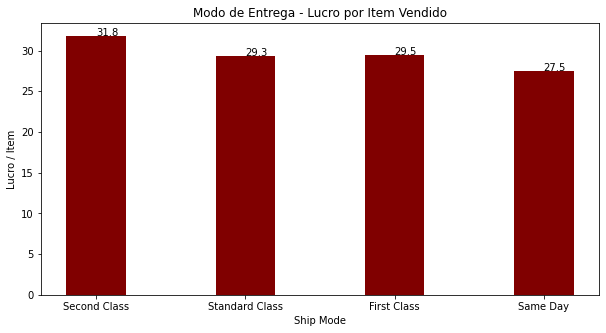

In [175]:
# creating the bar plot

arguments = orders['Ship Mode'].unique()
values = round(orders.groupby(['Ship Mode']).sum()['Profit'] / orders['Ship Mode'].value_counts(),1)

fig = plt.figure(figsize = (10, 5))

plt.bar(arguments, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Ship Mode")
plt.ylabel("Lucro / Item")
plt.title("Modo de Entrega - Lucro por Item Vendido")
plt.text(0, values[0], values[0])
plt.text(1, values[1], values[1])
plt.text(2, values[2], values[2])
plt.text(3, values[3], values[3])
plt.show()

In [163]:
orders.groupby(['Ship Mode']).sum()['Profit'] / orders['Ship Mode'].value_counts()

First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
dtype: float64

Coluna **Customer ID**

In [11]:
print("Clientes únicos:",orders['Customer ID'].nunique())

Clientes únicos: 793


(0.0, 120.0)

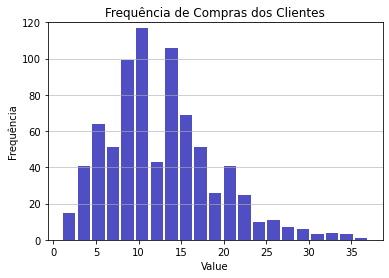

In [12]:
orders['Customer ID'].value_counts()
n, bins, patches = plt.hist(x=orders['Customer ID'].value_counts(), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequência')
plt.title('Frequência de Compras dos Clientes')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Coluna **Segment**

Segmentos únicos: 3


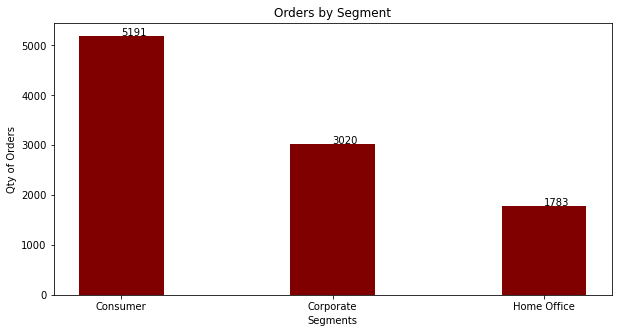

In [13]:
print("Segmentos únicos:",orders.Segment.nunique())

arguments = orders.Segment.unique()
values = orders.Segment.value_counts()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(arguments, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Segments")
plt.ylabel("Qty of Orders")
plt.title("Orders by Segment")
plt.text(0, values[0], values[0])
plt.text(1, values[1], values[1])
plt.text(2, values[2], values[2])
plt.show()

Coluna **Country**

In [14]:
print("Países únicos:",orders.Country.nunique())

Países únicos: 1


Coluna **City**

In [15]:
print("Cidades únicas:",orders.City.nunique())
orders.City.unique()
orders.City.value_counts()  

Cidades únicas: 531


New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

Coluna **State**

In [16]:
print("Estados únicos:",orders.State.nunique())
orders.State.unique()

Estados únicos: 49


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Coluna **Region**

In [17]:
print("Regiões únicas:",orders.Region.nunique())
print(orders.Region.unique())
orders.Region.value_counts()

Regiões únicas: 4
['South' 'West' 'Central' 'East']


West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

Coluna **Product ID**

In [18]:
print("ID de Produtos únicos:",orders['Product ID'].nunique())

ID de Produtos únicos: 1862


Coluna **Category**

In [19]:
print("Categorias únicas:",orders.Category.nunique())
categorias = orders.Category.unique()
orders.Category.value_counts()

Categorias únicas: 3


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Coluna **Sub-Category**

In [20]:
for i in range(len(categorias)):
    print("Categoria:", categorias[i], ' ||  freq:', orders.loc[orders['Category']==categorias[i],'Sub-Category'].count())
    #print(orders.loc[orders['Category']==categorias[i],'Sub-Category'].unique())
    print(orders.loc[orders['Category']==categorias[i],'Sub-Category'].value_counts())
    print()

Categoria: Furniture  ||  freq: 2121
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

Categoria: Office Supplies  ||  freq: 6026
Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: Sub-Category, dtype: int64

Categoria: Technology  ||  freq: 1847
Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64



Valores negativos na coluna Profit. Investigar

In [170]:
orders.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Sales No Discount
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,286.565443
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,864.095772
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.990000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,21.360000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,64.960000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,251.910000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,45276.960000


Verificando se existe entrada onde o Lucro (Profit) é maior do que as Vendas (Sales). **Não encontrado**

In [169]:
orders.loc[orders.Profit > orders.Sales,:]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales No Discount


Coluna **Profit**

Muitas compras com lucro negativo. Investigar relação com vendedores ou orders retornadas

In [171]:
orders.loc[orders.Profit<0,:].shape

(1871, 22)

Coluna **Discount**

Descontos se concentram entre 8 e 15%


(0.0, 120.0)

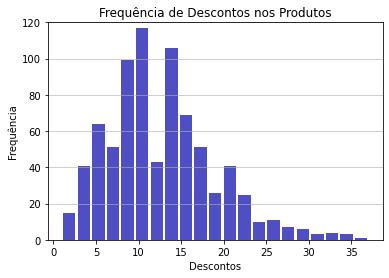

In [174]:
orders['Discount'].value_counts()
n, bins, patches = plt.hist(x=orders['Customer ID'].value_counts(), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Descontos')
plt.ylabel('Frequência')
plt.title('Frequência de Descontos nos Produtos')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## Base de dados Returns

In [23]:
returns = pd.read_excel("sample.xls", sheet_name=1)

In [24]:
returns.shape

(296, 2)

In [25]:
returns.isna().sum()

Returned    0
Order ID    0
dtype: int64

In [26]:
returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [27]:
returns.tail()

,Returned,Order ID
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796
295,Yes,CA-2015-149636


## Base de dados People

In [28]:
people = pd.read_excel("sample.xls", sheet_name=2)

In [29]:
people.shape

(4, 2)

In [30]:
display(people)

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


## Merging das bases de dados

Foram criadas duas bases de dados: dados e vendas

- Cada linha de **dados** corresponde a um item vendido (retornado ou não). Pode haver mais de um item em um mesmo pedido
- Cada linha de **vendas** corresponde a um pedido.

In [31]:
dados = pd.merge(orders, people)

Agrupando as ordens por pedido (Order ID)

In [32]:
somas = orders.groupby(['Order ID']).sum()[['Sales','Quantity','Profit', 'Sales No Discount']]

In [33]:
somas.head()

,Sales,Quantity,Profit,Sales No Discount
Order ID,,,,
CA-2014-100006,377.970,3,109.6113,377.97
CA-2014-100090,699.192,9,-19.0890,873.99
CA-2014-100293,91.056,6,31.8696,113.82
CA-2014-100328,3.928,1,1.3257,4.91
CA-2014-100363,21.376,5,7.7192,26.72


Calculando desconto total da ordem

In [34]:
desconto = 1 - somas.Sales / somas['Sales No Discount']

In [35]:
somas.insert(2, column='Discount', value=desconto)

In [36]:
somas.head()

,Sales,Quantity,Discount,Profit,Sales No Discount
Order ID,,,,,
CA-2014-100006,377.970,3,0.0,109.6113,377.97
CA-2014-100090,699.192,9,0.2,-19.0890,873.99
CA-2014-100293,91.056,6,0.2,31.8696,113.82
CA-2014-100328,3.928,1,0.2,1.3257,4.91
CA-2014-100363,21.376,5,0.2,7.7192,26.72


In [37]:
somas.index

Index(['CA-2014-100006', 'CA-2014-100090', 'CA-2014-100293', 'CA-2014-100328',
       'CA-2014-100363', 'CA-2014-100391', 'CA-2014-100678', 'CA-2014-100706',
       'CA-2014-100762', 'CA-2014-100860',
       ...
       'US-2017-167570', 'US-2017-167920', 'US-2017-168116', 'US-2017-168613',
       'US-2017-168690', 'US-2017-168802', 'US-2017-169320', 'US-2017-169488',
       'US-2017-169502', 'US-2017-169551'],
      dtype='object', name='Order ID', length=5009)

In [38]:
somas.shape

(5009, 5)

Preparando as colunas categóricas

In [39]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Sales No Discount'],
      dtype='object')

In [40]:
colunas_categoricas = orders.columns[[1,2,5,6,8,9,10,11,12]]
print(colunas_categoricas)
for i in range(len(colunas_categoricas)):
    somas.insert(i, colunas_categoricas[i], '')

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Country',
       'City', 'State', 'Postal Code', 'Region'],
      dtype='object')


In [41]:
somas['Order ID'] = somas.index
somas.index = range(somas.shape[0])

In [42]:
for i in range(somas.shape[0]):
    aux = dados.loc[dados['Order ID'] == somas['Order ID'][i], :]
    somas['Order Date'][i] = aux['Order Date'].iloc[0]
    somas['Customer ID'][i] = aux['Customer ID'].iloc[0]
    somas['Customer Name'][i] = aux['Customer Name'].iloc[0]
    somas['Country'][i] = aux['Country'].iloc[0]
    somas['City'][i] = aux['City'].iloc[0]
    somas['State'][i] = aux['State'].iloc[0]
    somas['Postal Code'][i] = aux['Postal Code'].iloc[0]
    somas['Region'][i] = aux['Region'].iloc[0]

<ipython-input-42-bb87c7f970ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somas['Order Date'][i] = aux['Order Date'].iloc[0]
<ipython-input-42-bb87c7f970ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somas['Customer ID'][i] = aux['Customer ID'].iloc[0]
<ipython-input-42-bb87c7f970ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somas['Customer Name'][i] = aux['Customer Name'].iloc[0]
<ipython-input-42-bb87c7f970ce>:6: 

In [43]:
somas.head()

,Order ID,Order Date,Customer ID,Customer Name,Country,City,State,Postal Code,Region,Sales,Quantity,Discount,Profit,Sales No Discount
0,CA-2014-100006,2014-09-07 00:00:00,DK-13375,Dennis Kane,United States,New York City,New York,10024,East,377.970,3,0.0,109.6113,377.97
1,CA-2014-100090,2014-07-08 00:00:00,EB-13705,Ed Braxton,United States,San Francisco,California,94122,West,699.192,9,0.2,-19.0890,873.99
2,CA-2014-100293,2014-03-14 00:00:00,NF-18475,Neil Französisch,United States,Jacksonville,Florida,32216,South,91.056,6,0.2,31.8696,113.82
3,CA-2014-100328,2014-01-28 00:00:00,JC-15340,Jasper Cacioppo,United States,New York City,New York,10024,East,3.928,1,0.2,1.3257,4.91
4,CA-2014-100363,2014-04-08 00:00:00,JM-15655,Jim Mitchum,United States,Glendale,Arizona,85301,West,21.376,5,0.2,7.7192,26.72


#### vendas é a base de dados com os valores agregados das vendas, sem os itens dos pedidos decupados

In [44]:
vendas = somas

In [45]:
#dados.loc[dados['Order ID']==returns['Order ID'],'Returned']
keys = returns['Order ID']
values = returns.Returned
return_dict = dict(zip(keys, values))

In [46]:
vendas['Returned'] = 'No'
for i in range(vendas.shape[0]):
    vendas.Returned[i] = return_dict.get(dados['Order ID'][i], 'No')

<ipython-input-46-707a924329a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas.Returned[i] = return_dict.get(dados['Order ID'][i], 'No')


In [47]:
vendas.Returned.value_counts()

No     4444
Yes     565
Name: Returned, dtype: int64

In [48]:
vendas = pd.merge(vendas, people)

### Criando base com todas os itens

In [49]:
dados['Returned'] = 'No'

In [50]:
for i in range(dados.shape[0]):
    dados.Returned[i] = return_dict.get(dados['Order ID'][i], 'No')

<ipython-input-50-470e95b56287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.Returned[i] = return_dict.get(dados['Order ID'][i], 'No')


In [51]:
(dados.Returned=='Yes').sum()

800

In [137]:
dados.shape

(9994, 24)

In [138]:
dados.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales No Discount,Person,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,261.96,Cassandra Brandow,No
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,731.94,Cassandra Brandow,No
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1741.05,Cassandra Brandow,No
3,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,27.96,Cassandra Brandow,No
4,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,19.44,Cassandra Brandow,No


### Vendas - Lucro
Kelly Williams:
- apresentou menor lucro absoluto
- é quem apresentou maior prejuízo absoluto
- 35,2% das suas vendas apresentaram prejuízo
- foi quem mais realizou vendas com prejuízo

Chuck MaGee
- Apresentou maior ticket médio USD 484.50 / venda
- Segundo maior volume de vendas
- Segundo maior lucro nas vendas

Anna Andreadi
- Quem mais vendeu
- Quem mais lucrou

In [85]:
vendas_person_count = vendas.Person.value_counts()
vendas_person_count

Anna Andreadi        1611
Chuck Magee          1401
Kelly Williams       1175
Cassandra Brandow     822
Name: Person, dtype: int64

In [93]:
vendas_person_sum = vendas.groupby(['Person']).sum()
vendas_person_sum

,Sales,Quantity,Discount,Profit,Sales No Discount
Person,,,,,
Anna Andreadi,725457.8245,12266,182.454955,108418.4489,859056.81
Cassandra Brandow,391721.9050,6209,122.143689,46749.4303,497599.52
Chuck Magee,678781.2400,10618,211.728673,91522.7800,842820.93
Kelly Williams,501239.8908,8780,288.125072,39706.3625,664457.78


In [94]:
vendas_person_prejuizo = vendas.loc[vendas.Profit<0,'Person'].value_counts()
vendas_person_prejuizo

Kelly Williams       414
Chuck Magee          312
Anna Andreadi        156
Cassandra Brandow    140
Name: Person, dtype: int64

In [95]:
vendas_person_prejuizo / vendas_person_count

Anna Andreadi        0.096834
Cassandra Brandow    0.170316
Chuck Magee          0.222698
Kelly Williams       0.352340
Name: Person, dtype: float64

In [98]:
# Ticket médio
vendas_person_sum['Sales'] / vendas_person_count

Anna Andreadi        450.315223
Cassandra Brandow    476.547330
Chuck Magee          484.497673
Kelly Williams       426.587141
dtype: float64

### Retornos por Vendedores
- 11,3% das vendas foram retornadas
- Anna Andreadi teve 16,2% dos seus pedidos retornados
- Chuck Magee teve apenas 3,7% dos pedidos retornados

In [57]:
retornados = vendas.Returned.value_counts() / vendas.shape[0]
retornados

No     0.887203
Yes    0.112797
Name: Returned, dtype: float64

In [58]:
retornados[1]

0.1127969654621681

In [59]:
retornados_person = vendas.loc[dados.Returned == 'Yes', 'Person'].value_counts()
retornados_person

Anna Andreadi        261
Kelly Williams       148
Cassandra Brandow    104
Chuck Magee           52
Name: Person, dtype: int64

In [60]:
total_vendas = vendas['Person'].value_counts()
total_vendas

Anna Andreadi        1611
Chuck Magee          1401
Kelly Williams       1175
Cassandra Brandow     822
Name: Person, dtype: int64

In [61]:
retornados_person / total_vendas

Anna Andreadi        0.162011
Cassandra Brandow    0.126521
Chuck Magee          0.037116
Kelly Williams       0.125957
Name: Person, dtype: float64

### Lucro e Retornos por Categoria

#### Furniture
- Chairs respondem pelo maior percentual em vendas

#### Office Supplies
- categoria com menor valor em vendas
- Storage e Binders são as duas primeiras categorias, respectivamente, que respondem pelo maior percentual em vendas

#### Technology
- categoria com maior valor em vendas
- Phone responde pelo maior percentual em vendas

In [130]:
category = dados.groupby(['Category']).sum()
category

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Sales No Discount
Category,,,,,,,
Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728,927239.39
Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008,898283.53
Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481,1038412.12


In [131]:
category['Sales'] / category['Sales'].sum()

Category
Furniture          0.323002
Office Supplies    0.313010
Technology         0.363988
Name: Sales, dtype: float64

In [118]:
furniture = dados.loc[dados.Category=='Furniture',:].groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False)
furniture

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Sales No Discount
Sub-Category,,,,,,,
Chairs,3121503,34936229,328449.1030,2356,105.00,26590.1663,393820.20
Tables,1572664,18607828,206965.5320,1241,83.35,-17725.4811,277687.76
Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560,148156.55
Furnishings,4842624,51880430,91705.1640,3563,132.40,13059.1436,107574.88


In [133]:
furniture['Sales'] / furniture['Sales'].sum()

Sub-Category
Chairs         0.442654
Tables         0.278929
Bookcases      0.154825
Furnishings    0.123592
Name: Sales, dtype: float64

In [148]:
dados.loc[dados.Returned=='Yes',:]
dados.loc[dados.Category=='Furniture',:]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales No Discount,Person,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,261.96,Cassandra Brandow,No
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,731.94,Cassandra Brandow,No
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1741.05,Cassandra Brandow,No
7,73,US-2015-134026,2015-04-26,2015-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,...,Furniture,Chairs,High-Back Leather Manager's Chair,831.9360,8,0.20,-114.3912,1039.92,Cassandra Brandow,No
8,74,US-2015-134026,2015-04-26,2015-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,...,Furniture,Furnishings,Tenex Traditional Chairmats for Medium Pile Ca...,97.0400,2,0.20,1.2130,121.30,Cassandra Brandow,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9898,CA-2016-112830,2016-06-06,2016-06-10,Standard Class,LP-17095,Liz Preis,Consumer,United States,Fairfield,...,Furniture,Furnishings,Electrix Halogen Magnifier Lamp,466.3200,3,0.20,34.9740,582.90,Chuck Magee,No
9963,9899,CA-2016-112830,2016-06-06,2016-06-10,Standard Class,LP-17095,Liz Preis,Consumer,United States,Fairfield,...,Furniture,Furnishings,"Deflect-o EconoMat Nonstudded, No Bevel Mat",82.6400,2,0.20,0.0000,103.30,Chuck Magee,No
9964,9900,US-2014-117380,2014-03-28,2014-04-03,Standard Class,MP-18175,Mike Pelletier,Home Office,United States,Springfield,...,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,330.5880,1,0.40,-143.2548,550.98,Chuck Magee,No
9976,9939,CA-2016-169824,2016-12-12,2016-12-17,Standard Class,NS-18640,Noel Staavos,Corporate,United States,New York City,...,Furniture,Furnishings,Eldon 500 Class Desk Accessories,60.3500,5,0.00,19.9155,60.35,Chuck Magee,No


In [125]:
office_supplies = dados.loc[dados.Category=='Office Supplies',:].groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False)
office_supplies

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Sales No Discount
Sub-Category,,,,,,,
Storage,4126649,46248720,223843.608,3158,63.2,21278.8264,240341.07
Binders,7633935,83626398,203412.733,5974,567.0,30221.7633,331736.86
Appliances,2407754,25250538,107532.161,1729,77.6,18138.0054,126982.58
Paper,6886090,76299221,78479.206,5178,102.6,34053.5693,84809.54
Supplies,993554,10633558,46673.538,647,14.6,-1189.0995,50452.12
Art,3920109,43329658,27118.792,3000,59.6,6527.7870,29394.83
Envelopes,1207903,13325731,16476.402,906,20.4,6964.1767,17943.89
Labels,1817254,19552985,12486.312,1400,25.0,5546.2540,13298.00
Fasteners,1017287,12506063,3024.280,914,17.8,949.5182,3324.64


In [127]:
office_supplies['Sales'] / office_supplies['Sales'].sum()

Sub-Category
Storage       0.311306
Binders       0.282892
Appliances    0.149548
Paper         0.109143
Supplies      0.064910
Art           0.037715
Envelopes     0.022914
Labels        0.017365
Fasteners     0.004206
Name: Sales, dtype: float64

In [128]:
technology = dados.loc[dados.Category=='Technology',:].groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False)
technology

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Sales No Discount
Sub-Category,,,,,,,
Phones,4395985,47897175,330007.054,3289,137.4,44515.7306,395846.12
Machines,561428,6364668,189238.631,440,35.2,3384.7569,288085.52
Accessories,3928080,44468434,167380.318,2976,60.8,41936.6357,179632.82
Copiers,355661,3873477,149528.030,234,11.0,55617.8249,174847.66


In [176]:
technology['Sales'] / technology['Sales'].sum()

Sub-Category
Phones         0.394673
Machines       0.226320
Accessories    0.200179
Copiers        0.178828
Name: Sales, dtype: float64

### Qualidade dos dados
Foram investigados:
- existência/ausência de valores faltantes
- linhas duplicadas
- quantidade de pedidos únicos
- possível existência de Profit maior que Sales

### Comentários Finais
- Base de retornos (**returns**) informa apenas o ID da ordem. Para um pedido com múltiplos itens (várias linhas em **orders**), devemos então considerar que **todos** os itens foram devolvidos. Não há devolução de apenas um item.
- Investigar quais sub-categorias possuem maior taxa de lucro
- Investigar quais sub-categorias possuem maior taxa de retorno
- Mapa de calor com valores em vendas nos Estados Unidos
- Cliente mais rentável
- Cliente que mais compra, em dólares
- Qual modo de entrega é mais lucrativo? (algum item pode ser entregue em conjunto com outro?)
- Qual(is) produto(s) com maiores descontos aplicados?
- O que explica Lucro (Profit)? Usar regressão linear
- O que explica Returned (Retorno)? Usar regressão logística / KNN